In [235]:
# Import The Important Necessary Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import joblib

In [236]:
# Read the Data
df = pd.read_csv('exercise.csv')

In [237]:
# Explore The Data.
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35


In [238]:
# Get Shape of Data (samples, features).
df.shape

(15000, 9)

In [239]:
# Get Information about Rows, null values, columns Data Types and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


In [240]:
# Drop User_ID column. It is not important.
df = df.drop('User_ID', axis= 1)
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190,94,29,105,40.8,231
1,female,20,166,60,14,94,40.3,66
2,male,69,179,79,5,88,38.7,26
3,female,34,179,71,13,100,40.5,71
4,female,27,154,58,10,81,39.8,35


In [241]:
df.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [242]:
# Check Null values.
df.isnull().sum()

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [243]:
# Check duplicates.
df.duplicated().sum()

1

In [244]:
# Remove duplicate Rows exist.
df.drop_duplicates(inplace= True)

In [245]:
# Check it again to ensure duplicate rows removed.
df.duplicated().sum()

0

<Axes: xlabel='Calories', ylabel='Count'>

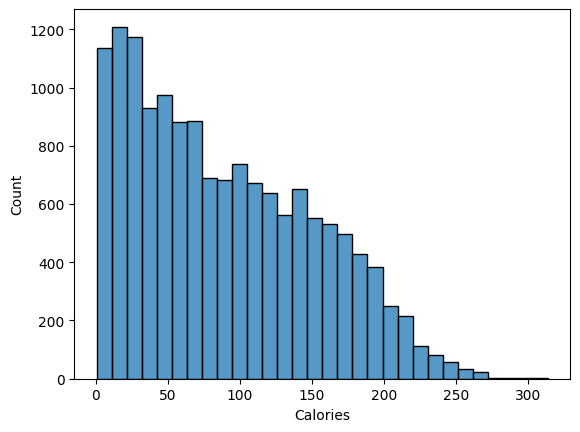

In [246]:
# Show Calories Distribution. It look as right skew distribtion.
sns.histplot(df['Calories'],bins=30)

In [247]:
# Get 1000 Samples to Show Scatters of features with the Target.
sample_df = df.sample(1000, random_state=42)

<function matplotlib.pyplot.show(close=None, block=None)>

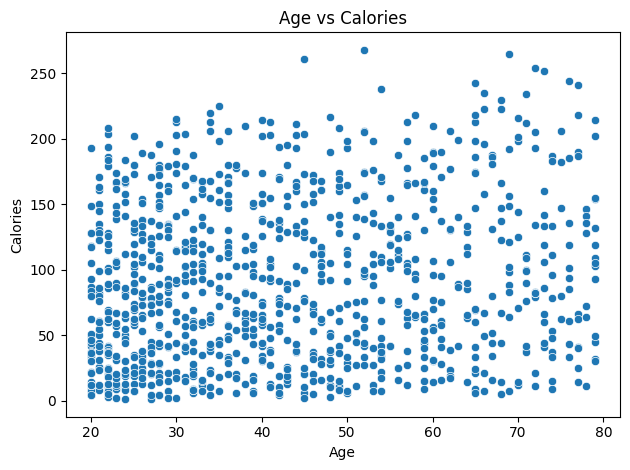

In [248]:
# Scatter of Age vs Calories
sns.scatterplot(x='Age', y='Calories', data=sample_df)
plt.title('Age vs Calories')
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

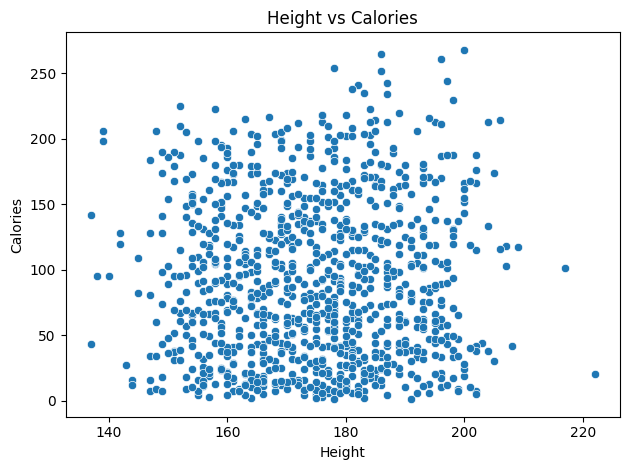

In [249]:
# Scater Height vs Calories.
sns.scatterplot(x='Height', y='Calories', data=sample_df)
plt.title('Height vs Calories')
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

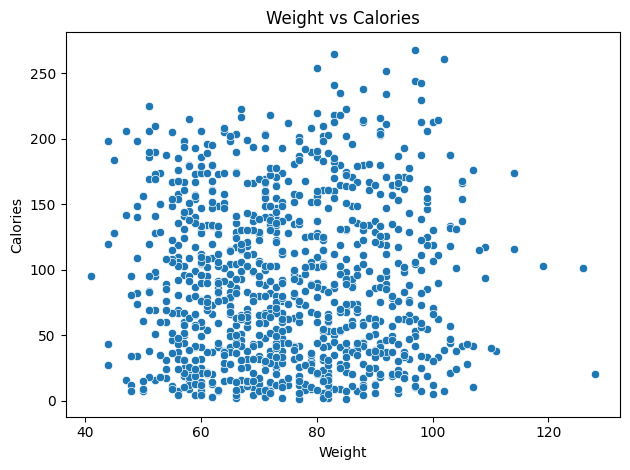

In [250]:
# Scatter of Weight vs Calories.
sns.scatterplot(x='Weight', y='Calories', data=sample_df)
plt.title('Weight vs Calories')
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

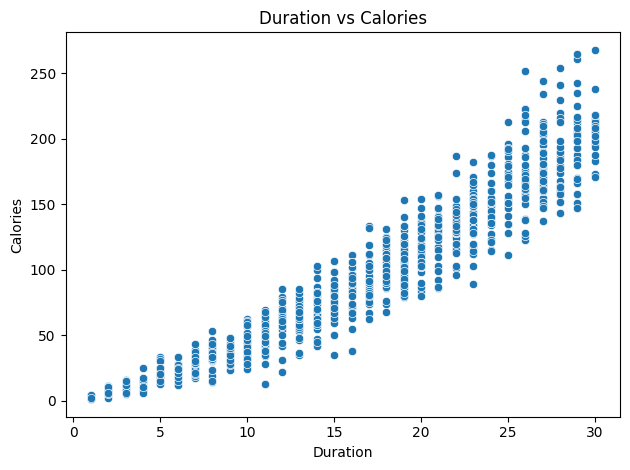

In [251]:
# Scatter of Duration vs Calories. 
sns.scatterplot(x='Duration', y='Calories', data=sample_df)
plt.title('Duration vs Calories')
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

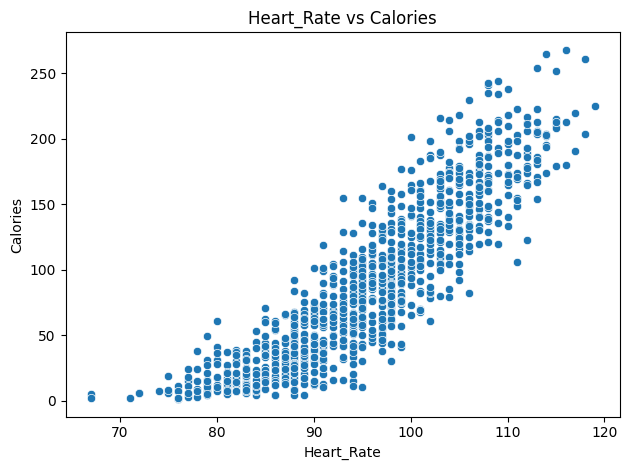

In [252]:
# Scatter of Heart Rate vs Calories 
sns.scatterplot(x='Heart_Rate', y='Calories', data=sample_df)
plt.title('Heart_Rate vs Calories')
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

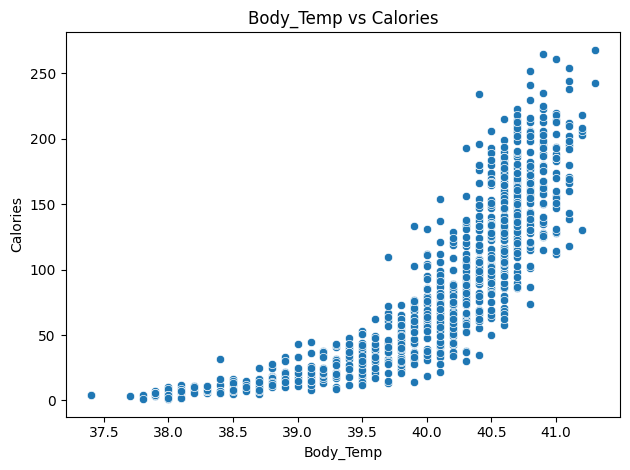

In [253]:
# Scatter of Body Tempreture vs Calories.
sns.scatterplot(x='Body_Temp', y='Calories', data=sample_df)
plt.title('Body_Temp vs Calories')
plt.tight_layout()
plt.show

In [254]:
# Group by Gender and get avg calories for thees groups.
grouped = df.groupby("Gender")["Calories"].mean()

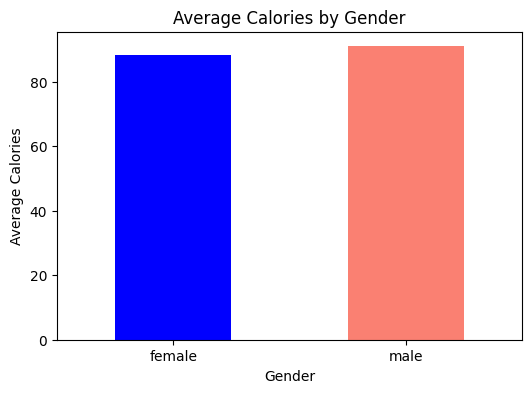

In [255]:
# Plot Average Calories by Gender to show is there a significan or simple difference between male and female ?
plt.figure(figsize=(6,4))
grouped.plot(kind='bar', color=['blue', 'salmon'])
plt.title("Average Calories by Gender")
plt.ylabel("Average Calories")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.show()

In [256]:
# Label encoding (Convert Gender column from categorical to numerical (0,1)).
df['Gender'] =df['Gender'].map({'male': 1 , 'female':0})

In [257]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,190,94,29,105,40.8,231
1,0,20,166,60,14,94,40.3,66
2,1,69,179,79,5,88,38.7,26
3,0,34,179,71,13,100,40.5,71
4,0,27,154,58,10,81,39.8,35


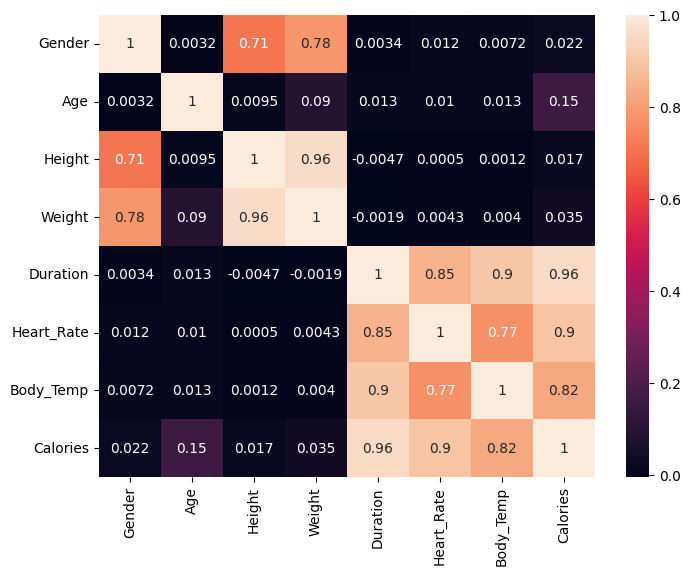

In [258]:
# Show Correlation matrix between the Data columns to identify which feature is important for the target and show feature correlations.
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(),annot=True, cbar=True)
plt.show()

In [259]:
# Show the most relevant features to the target.
corr_matrix = df.corr()
calories_corr = corr_matrix['Calories'].sort_values(ascending=False)

print(calories_corr)

Calories      1.000000
Duration      0.955419
Heart_Rate    0.897880
Body_Temp     0.824552
Age           0.154356
Weight        0.035426
Gender        0.022306
Height        0.017499
Name: Calories, dtype: float64


**Because of Support Vector Regression (SVR): Is robust to outliers & Multiolinearity.**

**I will keep all features**

  

In [260]:
# Define X (Features) , y (Target)
X = df.drop('Calories', axis = 1)
y = df['Calories']

In [261]:
# Split Data To train , test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [262]:
# Apply Feature Scaling because the SVR is senstive to Scaling and it depend on distance or similarity.
Scaler = StandardScaler()
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)

In [263]:
# Model Training Using Support Vector Regressior and Predection. 
svr = SVR(kernel="rbf", C=1.0, epsilon=0.1)        # Kernel = 'rbf' for non-linearitey relationship. 
svr.fit(X_train_scaled,y_train)
y_pred = svr.predict(X_test_scaled)

In [264]:
# Evaluate The Model Performance.
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("R2:", r2)

MAE: 2.303772892151691
R2: 0.9913958393783665


**Mean Absolute Error (MAE): On average, the model is off by ±2.3 calories.**

**R-Squared: The model explains 99.1% of the variance in calories.**

In [265]:
# Check if there is an Overfitting Problem.
y_train_pred = svr.predict(X_train_scaled)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae  = mean_absolute_error(y_test, y_pred)

print("Train MAE:", train_mae)
print("Test MAE :", test_mae)

Train MAE: 2.2873665399547716
Test MAE : 2.303772892151691


**The train and test errors are very close, which usually indicates that the model is not overfitting.**

**Hyperparameters tuning:**

In [266]:
# Hyperparameter Tuning
svr = SVR(kernel="rbf", C=1.2, epsilon=0.1)        
svr.fit(X_train_scaled,y_train)
y_pred = svr.predict(X_test_scaled)

In [267]:
# Evaluate The Model Performance on the New Parameter values.
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("R2:", r2)

MAE: 2.0221536597641494
R2: 0.992991237232355


In [268]:
# Check if there is an Overfitting Problem after hyperparameter.
y_train_pred = svr.predict(X_train_scaled)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae  = mean_absolute_error(y_test, y_pred)

print("Train MAE:", train_mae)
print("Test MAE :", test_mae)

Train MAE: 1.9977563099293292
Test MAE : 2.0221536597641494


In [269]:
joblib.dump(Scaler, 'Scaler_SVR.pkl')
joblib.dump(svr, 'SVR_Model.pkl')

['SVR_Model.pkl']

In [270]:
print("Model Training Done.")
print("Model Evaluation Done.")
print("Model Hyperparameters tuning Done.")
print("Model and scaler saved successfully.")

Model Training Done.
Model Evaluation Done.
Model Hyperparameters tuning Done.
Model and scaler saved successfully.
